# Loan Prediction

## Introduction

Loans from banks or other money lending instituions are not given to everyone who asks for them. The applicant must provide various background information about themselves and with this information the lender can make a decision whether or not to grant them that loan. In this project we are going to be building a predicitive model to determine if an applicant is eligible to recieve a loan (IE whether or not they would be able to repay that loan)

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

We will be using two datasets, a train set and a test set. Lets import these now and take a look at them

In [2]:
train = pd.read_csv('../LoanPrediction/traindata.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('../LoanPrediction/testdata.csv')

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Taking a look at the above information we have 8 categorical variables (objects), 1 integer variable (int64), and 4 variables that have some decimal values (float64). Now lets take a look at how many columns and rows we are dealing with.

In [9]:
train.shape

(614, 13)

614 rows, 13 columns

In [10]:
test.shape

(367, 12)

367 rows, and 12 columns

# Exploratory Data Analysis

Let's take a look at the data more in depth by comparing some of the variables with each other. With this we can establish some hypotheses.

<AxesSubplot:>

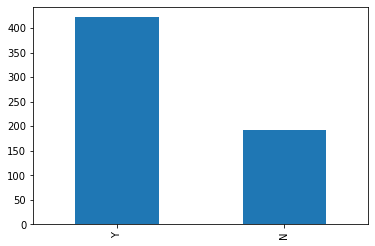

In [11]:
train['Loan_Status'].value_counts().plot.bar()

In [12]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Comparing the number of loan acceptance vs. rejection we can see approximately 69% of applicants were approved for loans while 31% were denied. Lets take a look at a few more variables.

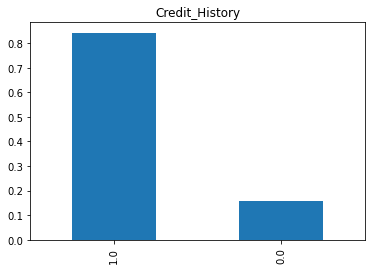

In [13]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

The vast majority of people in the data have a credit history.

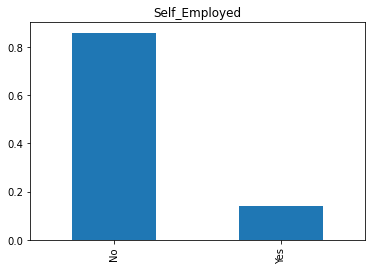

In [14]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

Same can be said of self employed vs. not self employed.

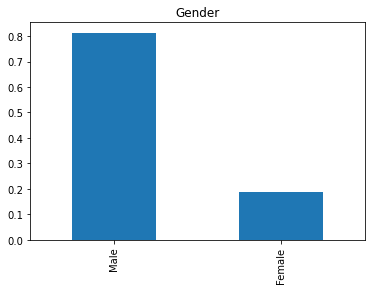

In [15]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()

Most applicants are male.

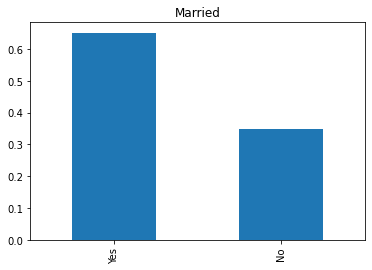

In [16]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

In [17]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

Approximately 65% are married while 35% are not

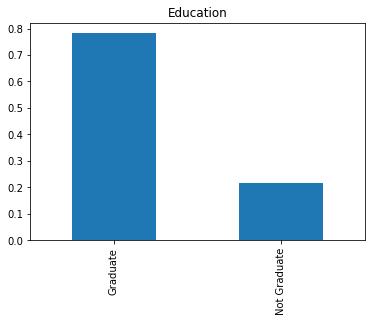

In [18]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

Most of the applicants have graduated (though this data does not specify to which level)

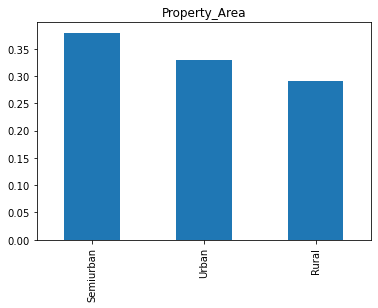

In [19]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The applicants live in roughly a equal distribution of all three areas.

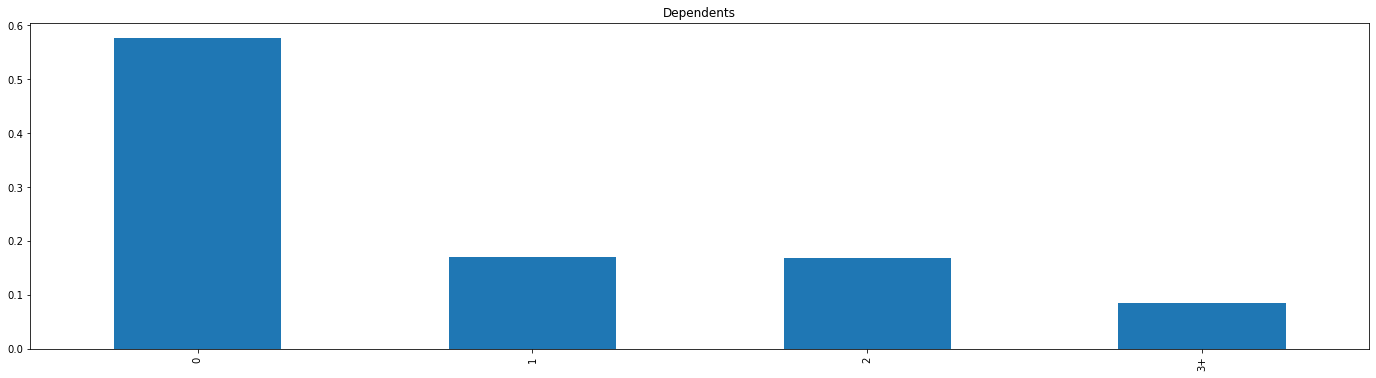

In [20]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

In [21]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

With all the categorical and ordinal data out of the way let's look at the numeric data.

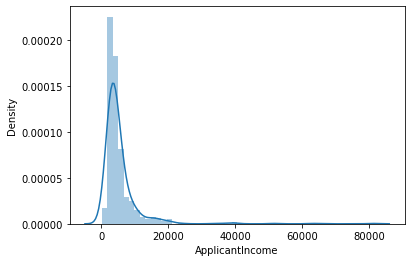

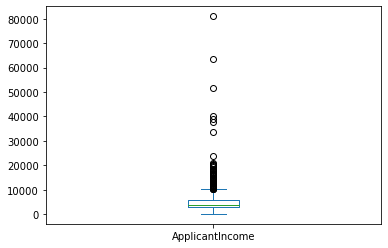

In [22]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box()
plt.show()

The distribution is not normal and heavily skewed to the right. The boxplot also shows some extreme outliers. Before we train our model we will have to normalize the data. Before that, let's continue on with our analysis.

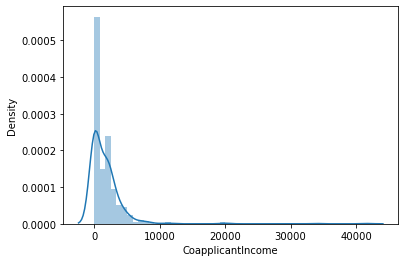

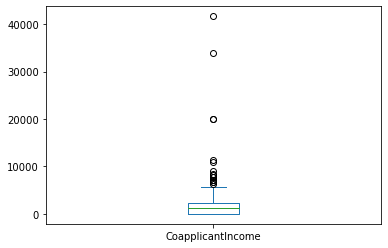

In [23]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box()
plt.show()

The same can be said for co-applicant income. We will deal with the normalizing later.

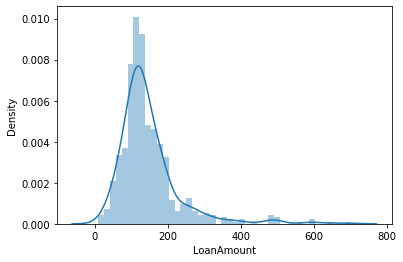

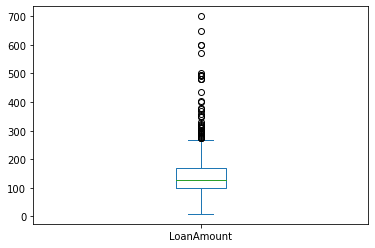

In [24]:
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box()
plt.show()

Loan amount distribution is actually fairly normal but there are still a number of outliers we will take care of later.

# Hypotheses

After looking at all the data let's make a few hypotheses.
* Applicants who have credit history (repaid their loans in the past) should have higher approval rates
* Applicants with higher incomes should have higher approval rates
* The loan amount and loan term should correlate with approval rating. Higher loan amounts over shorter periods of time should negativley impact approval where as the oppisite should positively impact approval.

Let's start plotting the Independent variables against the target variable and find out.

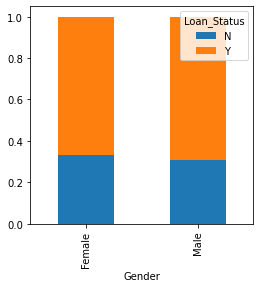

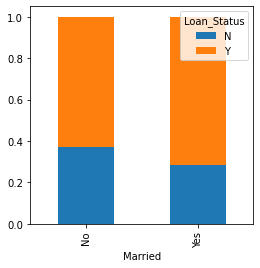

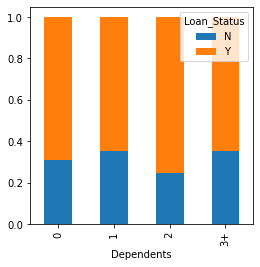

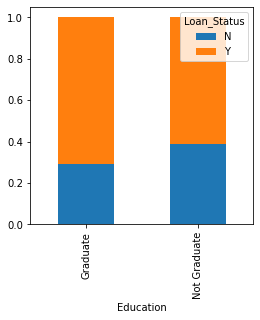

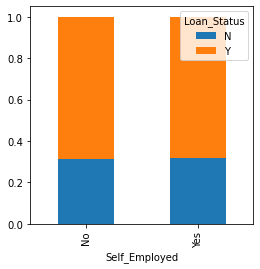

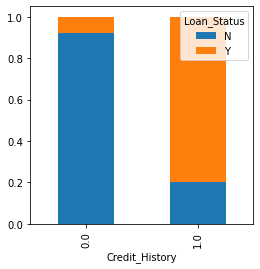

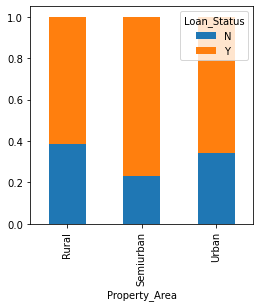

In [25]:
catColumns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for columns in catColumns:
    plot=pd.crosstab(train[columns],train['Loan_Status'])
    plot.div(plot.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
    plt.show()

Out of all of the categorical variables Credit History has the highest varriance of approval rate. The other variables that positively impact approval rating would be married applicants, applicants who have graduated, applicants who have 2 dependents, and applicants who live in semiurban areas. Next in order to look at the numerical variables we will have to set up some bins.

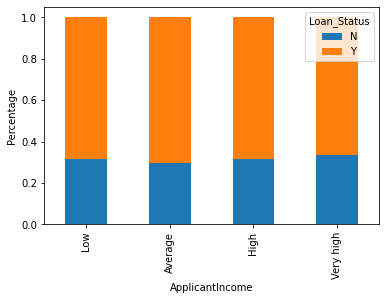

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

This graph invalidates our hypothesis about income having an effect on approval rate.

Next, I wanted to take a look at co-applicant income vs loan status but there is a problem. Some applicants did not have a co-signer and thus have no co-applicant income. This dataset does not distingush between an applicant who did not have a co-signer and an applicant with a co-signer who has no income so we can't filter them out. Instead we can add the applicant income and the co-applicant income together.

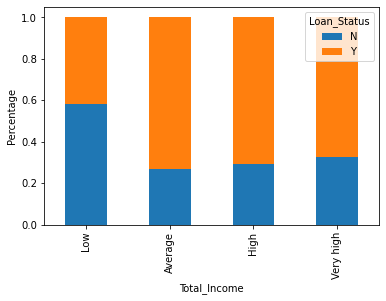

In [27]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

This plot shows that a higher income does have an effect on approval rating.

Lastly, let's look at loan amount.

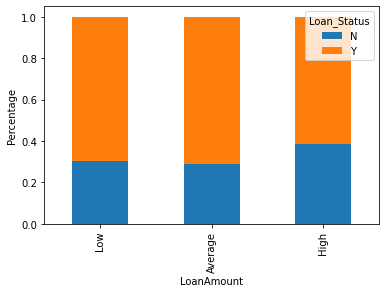

In [28]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

Our original hypothesis is true about loan amounts. The higher the loan amount the more likely it is to be denied.

Lastly let's look at the loan term.

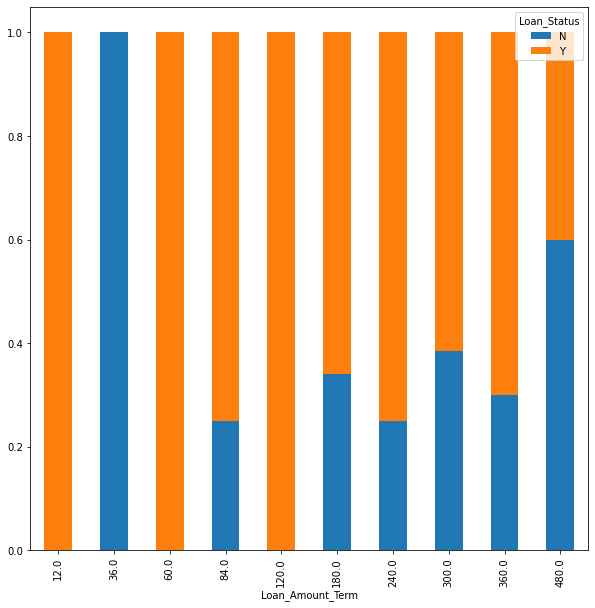

In [29]:
plot=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])
plot.div(plot.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,10))
plt.show()

The graph shows an interesting trend where as the higher the loan term the lower the acceptance rate but the lower term amounts don't seem right.

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

As you can see the vast majority of people who applied for loans did so with a term of 360. Let's make a plot with anything under 360 be short term while anything over be long term.

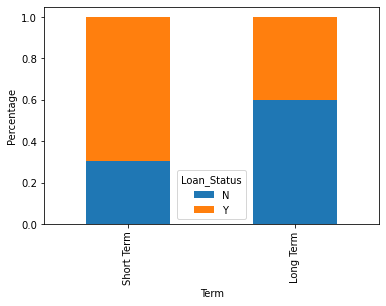

In [31]:
bins=[0,360,500]
group=['Short Term','Long Term']
train['Term_bin']=pd.cut(train['Loan_Amount_Term'],bins,labels=group)
Term_bin=pd.crosstab(train['Term_bin'],train['Loan_Status'])
Term_bin.div(Term_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Term')
P=plt.ylabel('Percentage')

This graph would suggest that shorter term loans are more likely to be approved than longer term loans.

Let's take a look at a correlation heat map against the target variable but first we must drop the columns we created and changes some variables in the data.

In [32]:
train=train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income', 'Term_bin'], axis=1)

In [33]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now let's take a look at a correlation heat map.

<AxesSubplot:>

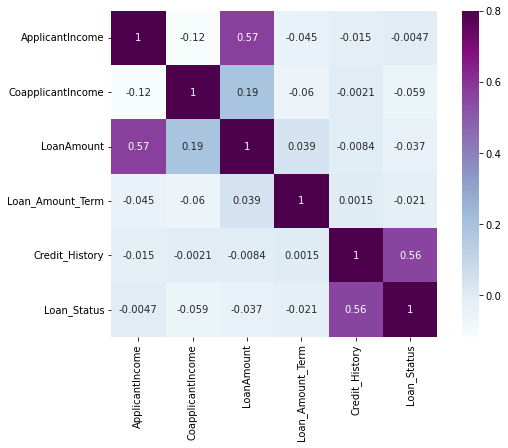

In [35]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

Looking at the heat map we have two highly correlated variables. Credit History - Loan Status and Applicant Income - Loan Amount.

# Dealing with missing values

There a few ways to deal with missing values. One quick way is to just drop the row containing a missing value. Although, this can be a problem if you have to many missing values and the other information in those effected rows could be significant to your model. Instead, we will employ a few simple ways to full those missing values. Let's take a look at how many missing values we are dealing with.

In [36]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Not a ton of missing values but still enough to cause a problem. In order to fill them we will do the following
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

Gender, Married, Dependents, Self_Employed, and Credit_History can all be filled using mode.

In [37]:
#Creating a backup
train2 = train

In [38]:
columnFill = ['Gender', 'Married', "Dependents", 'Self_Employed', 'Credit_History']
for columns in columnFill:
    train[columns].fillna(train[columns].mode()[0], inplace=True)

In [39]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Great, Now we have two columns left, LoanAmount and Loan_Amount_Term. Let's take a look at Loan_Amount_Term as even though it is a numeric variable it is already broken down into bins.

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Since, a loan term of 360 is by far the most common we can just replace the missing values by that (the mode).

In [41]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [42]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

All that is left is the LoanAmount. We can choose either the mean or median to fill in the missing values. We will chose to use median because as we saw earlier there are a lot of outliers which would drastically change the mean compared to the median.

In [43]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [44]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Everything is filled in but we have to do the same to the test set as well.

In [45]:
columnFill = ['Gender', 'Married', "Dependents", 'Self_Employed', 'Credit_History']
for columns in columnFill:
    test[columns].fillna(test[columns].mode()[0], inplace=True)

In [46]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [47]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

A quick note: The reason we do not concatenate the train and test data together and then do our cleaning is because our imputation method is based off of median and mode. If we did that the median and mode would both be different when we did our fills. This is a condition called data leakage and should be avoided.

# Dealing with outliers

There are many ways to deal with outliers. Similar to dealing with null values in data the easiest is to just remove the outliers. This is generally not best practice unless you know the data point was entered in error. Also, sometimes those outliers are the most interesting part of the data and just because it doesn't fit our model doesn't mean we should remove it. Instead we can transform them but still keeping their original impact within our model. One such transformation is by taking the log of the variables in question. Let's take a look at that now.

In [48]:
#Making a backup
train3 = train
test3 = test

In [49]:
train['LoanAmount'] = np.log(train['LoanAmount'])

Let's take a look at the data again.

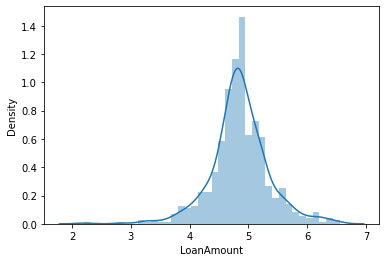

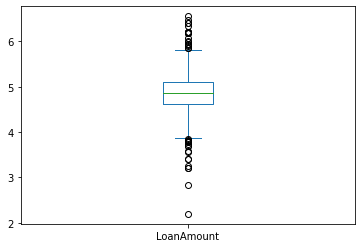

In [50]:
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box()
plt.show()

While we still have some outliers they are a lot less drastic and the distribution is more normal. Let's apply this to the test set as well.

In [51]:
test['LoanAmount'] = np.log(test['LoanAmount'])

We would like to now transform ApplicantIncome and CoapplicantIncome as well but there is a problem. The vast majority of entries for CoapplicantIncome are zero. While you can't take the log of zero that is not the problem. The problem is taking the log of our CoapplicantIncome destorys our distribution. What we can instead do is add CoapplicantIncome to ApplicantIncome and then take the log. We can drop the old columns after.

In [52]:
train['CombinedIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train = train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
train['CombinedIncome'] = np.log(train['CombinedIncome'])

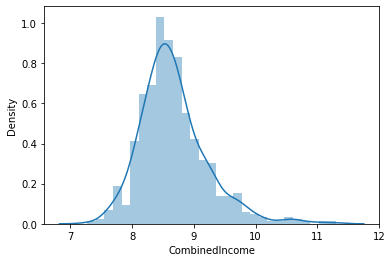

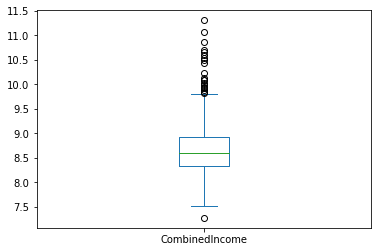

In [53]:
sns.distplot(train['CombinedIncome'])
plt.show()
train['CombinedIncome'].plot.box()
plt.show()

The distribution is now normal and the outliers, while some remain, are less extreme. Let's preform the same operation on our test set.

In [54]:
test['CombinedIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test = test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
test['CombinedIncome'] = np.log(test['CombinedIncome'])

# Model Building

Their are a lot of different models to chose from but when dealing with a binary output (0 or 1/True or False/Yes or No) Logistic Regression is a good choice. First we need to drop our Loan_ID coulmn as we will not need it for training.

In [55]:
train = train.drop(['Loan_ID'], axis=1)
test = test.drop(['Loan_ID'], axis=1)

We will be using Scikitlearn(sklearn) for our modeling. In order to use it, sklearn requires that the target variable is separate. Let's drop that now.

In [56]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

We also have to change any categorical variables into numeric variables. This is done by using "dummy variables" which changes each unique category into a number. For instance, the gender column which has "Male" and "Female" variables will be changed to "0" and "1" respectively.

In [57]:
X = pd.get_dummies(X)
test=pd.get_dummies(test)

We are ready to train a model but we need a way to validate that model. In this case we won't be using our test set as we will be using it to make a prediction later. We instead can use train_test_split which is a feature of sklearn.

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

Now that we have our training and validation datasets we can train our model.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [60]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

With our dataset we achieved a accuracy score of 80%. Not bad! We can now use our model to make a prediction on our test set.

In [61]:
pred_test = model.predict(test)

We need to first load in our answers as they are in a separate CVS.

In [62]:
testA = pd.read_csv('../LoanPrediction/testdatastatus.csv')

In [63]:
testA.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


We also need to drop the Loan_ID column and change the answers from N and Y to 1 and 0 respectively.

In [64]:
testA = testA.drop(columns=['Loan_ID'])

In [65]:
testA['Loan_Status'].replace('N', 1, inplace=True)
testA['Loan_Status'].replace('Y', 0, inplace=True)

In [66]:
accuracy_score(testA,pred_test)

0.8310626702997275

83% on a set of data the model has never seen is pretty good. From here we could continue to tune our model with more feature engineering and try out other models but we will end it here. Thank you for reading!